#**Bank Marketing Data Analysis**


**SECTION 1 — DATA LOADING, CLEANING & PREPROCESSING**

In [1]:
import pandas as pd
import numpy as np

raw_path = "/content/bank-full.csv"

df = pd.read_csv(raw_path, sep=";")  # dataset uses ; as separator

print("Dataset Shape (rows, columns):", df.shape)
print("\nColumn Data Types:\n")
print(df.dtypes)

df.head(10)

Dataset Shape (rows, columns): (45211, 17)

Column Data Types:

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [2]:
# Standardize categorical columns.

obj_cols = df.select_dtypes(include="object").columns

for col in obj_cols:
    df[col] = df[col].astype(str).str.strip().str.lower()

df[obj_cols].head()


,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no


In [3]:
# Replace 'unknown' strings with actual missing values.

df = df.replace("unknown", np.nan)

df.isna().sum().sort_values(ascending=False)


,0
poutcome,36959
contact,13020
education,1857
job,288
age,0
default,0
balance,0
housing,0
marital,0
loan,0


In [4]:
# Impute categorical missing values using MODE (most frequent value).

impute_log = {}

for col in obj_cols:
    if df[col].isna().sum() > 0:
        mode_val = df[col].mode()[0]
        df[col] = df[col].fillna(mode_val)
        impute_log[col] = mode_val

impute_log


{'job': 'blue-collar',
 'education': 'secondary',
 'contact': 'cellular',
 'poutcome': 'failure'}

In [5]:
# Encode target variable y (yes/no) to binary.

df["y_binary"] = df["y"].map({"yes": 1, "no": 0})
df[["y", "y_binary"]].head()


,y,y_binary
0,no,0
1,no,0
2,no,0
3,no,0
4,no,0


In [7]:
df.to_csv("bank_full_cleaned.csv", index=False)
"bank_full_cleaned.csv saved!"


'bank_full_cleaned.csv saved!'

**SECTION 2 — EXPLORATORY DATA ANALYSIS (EDA)**

In [15]:
# Load cleaned dataset into memory for EDA.

import seaborn as sns
df = pd.read_csv("/content/bank_full_cleaned.csv")
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,y_binary
0,58,management,married,tertiary,no,2143,yes,no,cellular,5,may,261,1,-1,0,failure,no,0
1,44,technician,single,secondary,no,29,yes,no,cellular,5,may,151,1,-1,0,failure,no,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,cellular,5,may,76,1,-1,0,failure,no,0
3,47,blue-collar,married,secondary,no,1506,yes,no,cellular,5,may,92,1,-1,0,failure,no,0
4,33,blue-collar,single,secondary,no,1,no,no,cellular,5,may,198,1,-1,0,failure,no,0


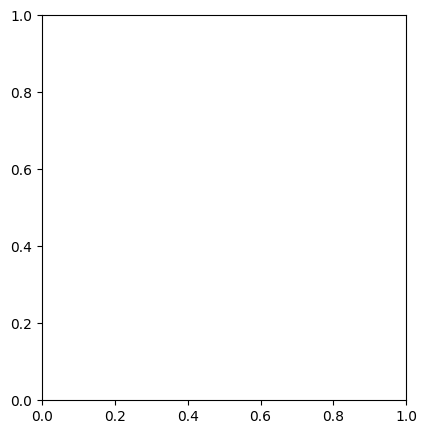

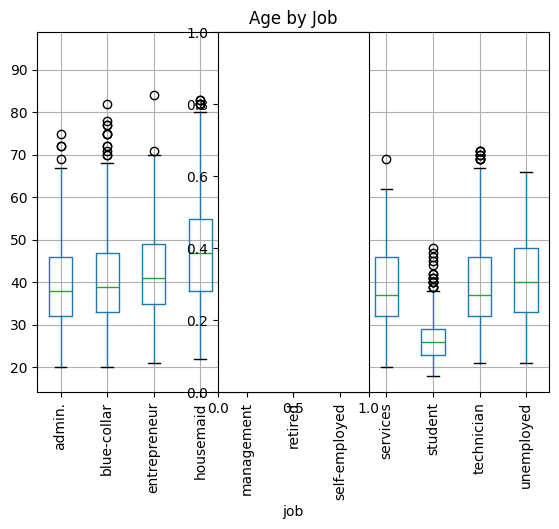

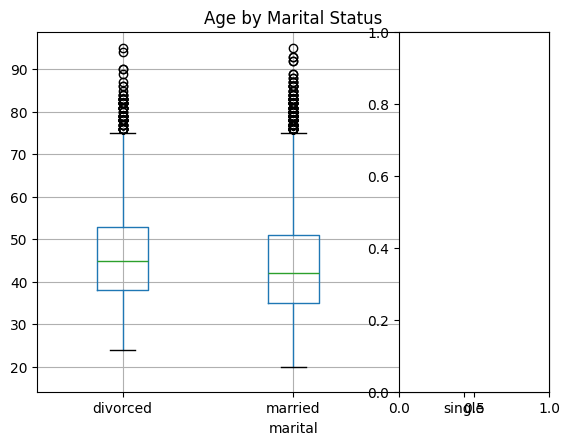

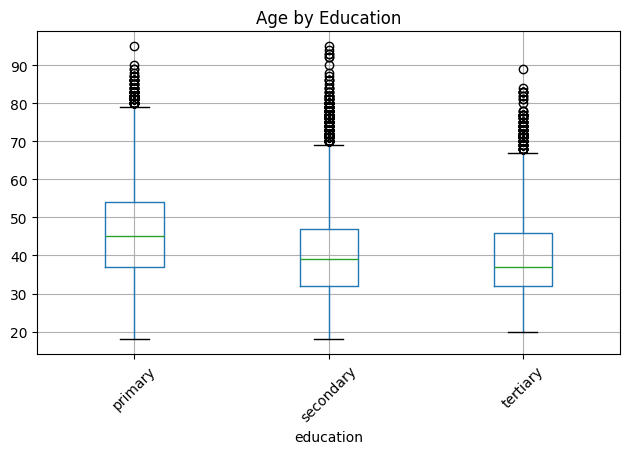

In [9]:
# Age demographics.

import matplotlib.pyplot as plt
plt.figure(figsize=(16,5))

plt.subplot(1,3,1)
df.boxplot(column="age", by="job", rot=90)
plt.title("Age by Job")
plt.suptitle("")

plt.subplot(1,3,2)
df.boxplot(column="age", by="marital")
plt.title("Age by Marital Status")
plt.suptitle("")

plt.subplot(1,3,3)
df.boxplot(column="age", by="education", rot=45)
plt.title("Age by Education")
plt.suptitle("")

plt.tight_layout()
plt.show()


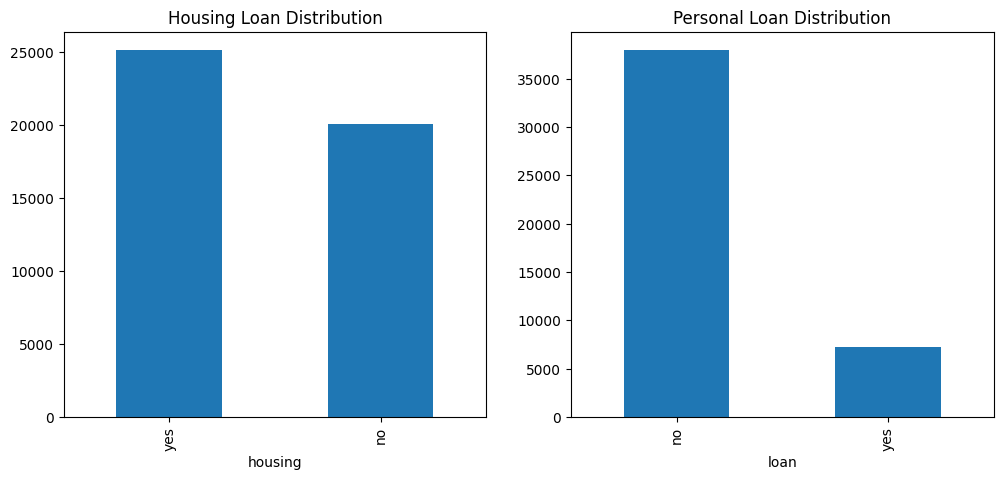

In [10]:
# Bar charts for housing and personal loans.

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
df["housing"].value_counts().plot(kind="bar")
plt.title("Housing Loan Distribution")

plt.subplot(1,2,2)
df["loan"].value_counts().plot(kind="bar")
plt.title("Personal Loan Distribution")

plt.show()


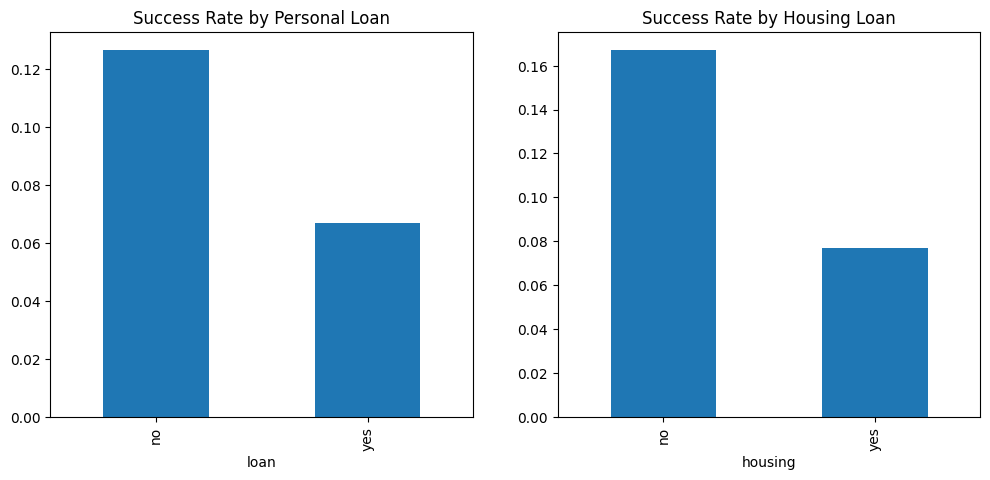

In [11]:
# Success rates for loan statuses.

loan_success = df.groupby("loan")["y_binary"].mean()
housing_success = df.groupby("housing")["y_binary"].mean()

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
loan_success.plot(kind="bar")
plt.title("Success Rate by Personal Loan")

plt.subplot(1,2,2)
housing_success.plot(kind="bar")
plt.title("Success Rate by Housing Loan")

plt.show()


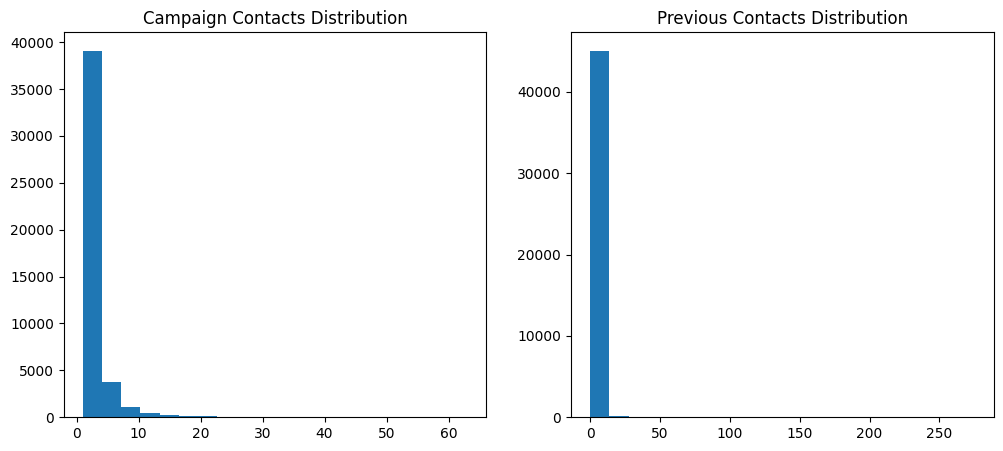

In [12]:
# Explore campaign & previous contact distributions.

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.hist(df["campaign"], bins=20)
plt.title("Campaign Contacts Distribution")

plt.subplot(1,2,2)
plt.hist(df["previous"], bins=20)
plt.title("Previous Contacts Distribution")

plt.show()


**SECTION 3 — Statistical Analysis**


In [13]:
# Welch t-tests for balance differences.

from scipy import stats

# Housing
group_yes = df[df['housing']=='yes']['balance']
group_no = df[df['housing']=='no']['balance']
print("Test: balance by housing (yes vs no)")
print("H0: equal means; H1: different")
tstat, pval = stats.ttest_ind(group_yes, group_no, equal_var=False)
print(f"t = {tstat:.4f}, p = {pval:.4e}")
print("means:", group_yes.mean(), group_no.mean())
if pval < 0.05:
    print("Conclusion: reject H0 (means differ at alpha=0.05)")
else:
    print("Conclusion: fail to reject H0 (no evidence of difference)")

# Personal loan
g_yes_loan = df[df['loan']=='yes']['balance']
g_no_loan = df[df['loan']=='no']['balance']
print("\nTest: balance by personal loan (yes vs no)")
t2, p2 = stats.ttest_ind(g_yes_loan, g_no_loan, equal_var=False)
print(f"t = {t2:.4f}, p = {p2:.4e}")
print("means:", g_yes_loan.mean(), g_no_loan.mean())
if p2 < 0.05:
    print("Conclusion: reject H0 (means differ at alpha=0.05)")
else:
    print("Conclusion: fail to reject H0")


Test: balance by housing (yes vs no)
H0: equal means; H1: different
t = -14.0811, p = 6.6254e-45
means: 1175.1030640668523 1596.5012698570788
Conclusion: reject H0 (means differ at alpha=0.05)

Test: balance by personal loan (yes vs no)
t = -25.1809, p = 2.7641e-137
means: 774.3099116510215 1474.4536307846288
Conclusion: reject H0 (means differ at alpha=0.05)


    feature  pearson_r        p_value
3  duration   0.394521   0.000000e+00
5     pdays   0.103621  3.790553e-108
6  previous   0.093236   7.801830e-88
4  campaign  -0.073172   1.012347e-54
1   balance   0.052838   2.521114e-29
2       day  -0.028348   1.653880e-09
0       age   0.025155   8.825644e-08


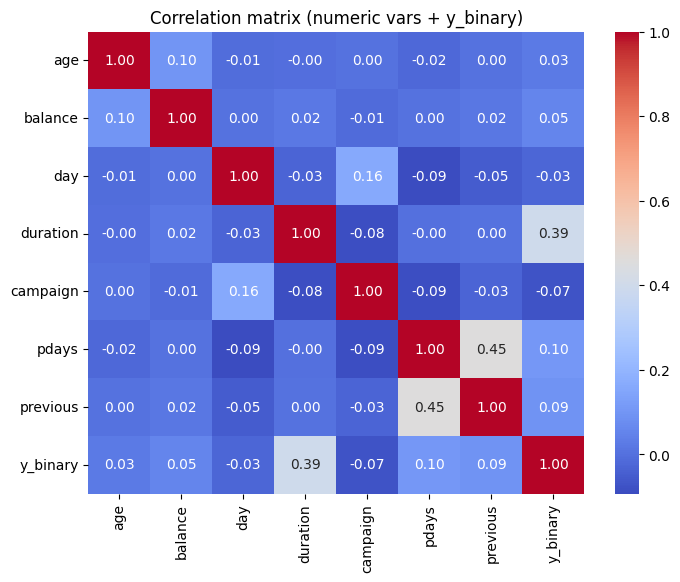

In [16]:


# Pearson correlations with y_binary.

num_vars = ['age','balance','day','duration','campaign','pdays','previous']
corr_res = []
for v in num_vars:
    valid = df[[v, 'y_binary']].dropna()
    r, p = stats.pearsonr(valid[v], valid['y_binary'])
    corr_res.append({'feature': v, 'pearson_r': r, 'p_value': p})
corr_df = pd.DataFrame(corr_res).sort_values(by='pearson_r', key=abs, ascending=False)
print(corr_df)

# Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df[num_vars + ['y_binary']].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation matrix (numeric vars + y_binary)')
plt.show()



In [18]:
corr_df.to_csv("pearson_correlations.csv", index=False)
print("File saved: pearson_correlations.csv")


File saved: pearson_correlations.csv


**SECTION 4 — Machine Learning Models**

In [22]:
import pickle
from pathlib import Path

# Scipy + sklearn (stat tests + ML)
from scipy import stats
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, classification_report, roc_curve, auc
)

# Random seed
RANDOM_SEED = 42

RAW_PATH = Path("bank-full.csv")                # Input file
CLEAN_PATH = Path("bank_full_cleaned.csv")      # Cleaned dataset


In [23]:
# Prepare feature list and train/test split.

features = [
    'age','job','marital','education','default','balance','housing','loan',
    'contact','day','month','duration','campaign','pdays','previous','poutcome'
]
numeric_features = ['age','balance','day','duration','campaign','pdays','previous']
categorical_features = [c for c in features if c not in numeric_features]

X = df[features].copy()
y = df['y_binary'].copy()

# Stratified train-test split (keeps class proportions)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=RANDOM_SEED, stratify=y
)
print("Shapes: X_train", X_train.shape, "X_test", X_test.shape)
print("Positive ratio (train):", y_train.mean(), " (test):", y_test.mean())


Shapes: X_train (33908, 16) X_test (11303, 16)
Positive ratio (train): 0.1169930399905627  (test): 0.1169600990887375


In [24]:
# Build ColumnTransformer and pipelines for both models.

# Numeric transformer: StandardScaler
numeric_transformer = Pipeline([('scaler', StandardScaler())])

# Categorical transformer: OneHotEncoder
categorical_transformer = Pipeline([('onehot', OneHotEncoder(handle_unknown='ignore'))])

# ColumnTransformer: combine numeric and categorical pipes
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

# Pipelines
logreg_pipeline = Pipeline([('preprocessor', preprocessor),
                            ('clf', LogisticRegression(random_state=RANDOM_SEED, max_iter=1000))])

rf_pipeline = Pipeline([('preprocessor', preprocessor),
                        ('clf', RandomForestClassifier(random_state=RANDOM_SEED, n_estimators=200))])


In [25]:
# Cross-validation and final training.

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_SEED)

print("Cross-validating Logistic Regression (ROC-AUC)...")
logreg_cv_scores = cross_val_score(logreg_pipeline, X_train, y_train, cv=cv, scoring='roc_auc', n_jobs=1)
print("LogReg CV ROC-AUC scores:", logreg_cv_scores)
print("Mean:", logreg_cv_scores.mean())

print("\nCross-validating Random Forest (ROC-AUC)...")
rf_cv_scores = cross_val_score(rf_pipeline, X_train, y_train, cv=cv, scoring='roc_auc', n_jobs=1)
print("RF CV ROC-AUC scores:", rf_cv_scores)
print("Mean:", rf_cv_scores.mean())

# Fit final models
logreg_pipeline.fit(X_train, y_train)
rf_pipeline.fit(X_train, y_train)
print("\nFinal models fitted on full training data.")


Cross-validating Logistic Regression (ROC-AUC)...
LogReg CV ROC-AUC scores: [0.91119469 0.90009301 0.90088426 0.89629932 0.89873063]
Mean: 0.9014403826871458

Cross-validating Random Forest (ROC-AUC)...
RF CV ROC-AUC scores: [0.92965571 0.91834645 0.92190132 0.9164189  0.91733804]
Mean: 0.9207320854136384

Final models fitted on full training data.


In [26]:
# Evaluate models on the holdout test set.

# Helper to evaluate
def evaluate_model(pipe, X_test, y_test):
    y_pred = pipe.predict(X_test)
    # predicted probability for positive class
    y_proba = pipe.predict_proba(X_test)[:,1]
    metrics = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred, zero_division=0),
        'recall': recall_score(y_test, y_pred, zero_division=0),
        'f1': f1_score(y_test, y_pred, zero_division=0),
        'roc_auc': roc_auc_score(y_test, y_proba),
        'confusion_matrix': confusion_matrix(y_test, y_pred),
        'classification_report': classification_report(y_test, y_pred, zero_division=0),
        'y_proba': y_proba,
        'y_pred': y_pred
    }
    return metrics

logreg_eval = evaluate_model(logreg_pipeline, X_test, y_test)
rf_eval = evaluate_model(rf_pipeline, X_test, y_test)


In [27]:
# Print metrics
for name, ev in [('Logistic Regression', logreg_eval), ('Random Forest', rf_eval)]:
    print(f"\n--- {name} ---")
    print(f"Accuracy: {ev['accuracy']:.4f}")
    print(f"Precision: {ev['precision']:.4f}")
    print(f"Recall: {ev['recall']:.4f}")
    print(f"F1: {ev['f1']:.4f}")
    print(f"ROC-AUC: {ev['roc_auc']:.4f}")
    print("Confusion matrix:\n", ev['confusion_matrix'])
    print("Classification report:\n", ev['classification_report'])


--- Logistic Regression ---
Accuracy: 0.8995
Precision: 0.6336
Recall: 0.3336
F1: 0.4371
ROC-AUC: 0.9027
Confusion matrix:
 [[9726  255]
 [ 881  441]]
Classification report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94      9981
           1       0.63      0.33      0.44      1322

    accuracy                           0.90     11303
   macro avg       0.78      0.65      0.69     11303
weighted avg       0.88      0.90      0.89     11303


--- Random Forest ---
Accuracy: 0.9051
Precision: 0.6680
Recall: 0.3744
F1: 0.4799
ROC-AUC: 0.9207
Confusion matrix:
 [[9735  246]
 [ 827  495]]
Classification report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95      9981
           1       0.67      0.37      0.48      1322

    accuracy                           0.91     11303
   macro avg       0.79      0.67      0.71     11303
weighted avg       0.89      0.91      0.89     11303



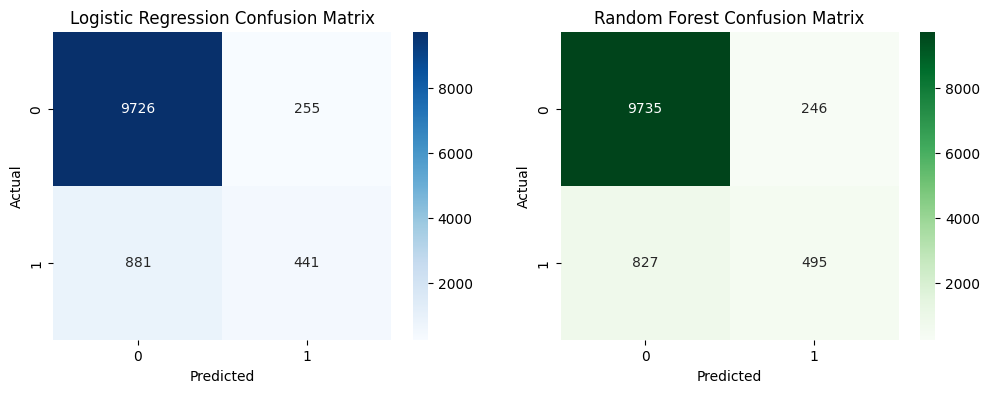

In [28]:
# Confusion matrix heatmaps
fig, axes = plt.subplots(1,2, figsize=(12,4))
sns.heatmap(logreg_eval['confusion_matrix'], annot=True, fmt='d', ax=axes[0], cmap='Blues')
axes[0].set_title('Logistic Regression Confusion Matrix')
axes[0].set_xlabel('Predicted'); axes[0].set_ylabel('Actual')

sns.heatmap(rf_eval['confusion_matrix'], annot=True, fmt='d', ax=axes[1], cmap='Greens')
axes[1].set_title('Random Forest Confusion Matrix')
axes[1].set_xlabel('Predicted'); axes[1].set_ylabel('Actual')
plt.show()

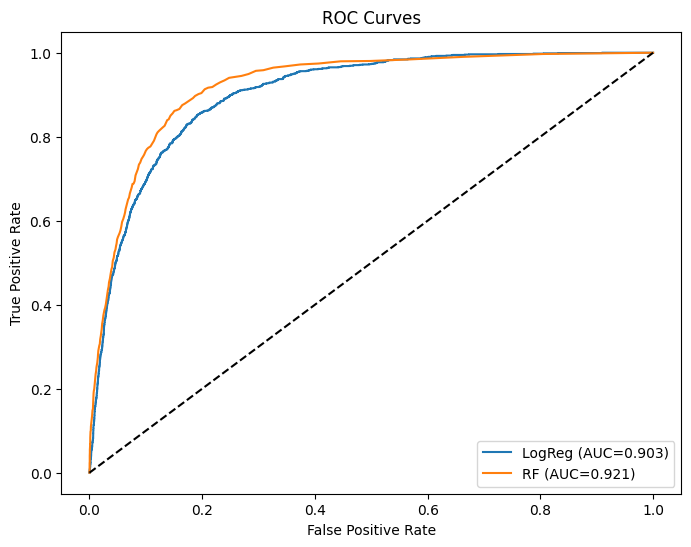

In [29]:
# ROC curves
fpr_lr, tpr_lr, _ = roc_curve(y_test, logreg_eval['y_proba'])
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_eval['y_proba'])
plt.figure(figsize=(8,6))
plt.plot(fpr_lr, tpr_lr, label=f"LogReg (AUC={logreg_eval['roc_auc']:.3f})")
plt.plot(fpr_rf, tpr_rf, label=f"RF (AUC={rf_eval['roc_auc']:.3f})")
plt.plot([0,1],[0,1], 'k--')
plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate')
plt.title('ROC Curves'); plt.legend(); plt.show()


In [30]:
# Feature importances from Random Forest (mapping back to column names)
ohe = rf_pipeline.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot']
ohe_feature_names = list(ohe.get_feature_names_out(categorical_features))
feature_names = numeric_features + ohe_feature_names
rf_clf = rf_pipeline.named_steps['clf']
importances = rf_clf.feature_importances_
imp_df = pd.DataFrame({'feature': feature_names, 'importance': importances}).sort_values('importance', ascending=False)
print("\nTop 20 Random Forest features by importance:\n", imp_df.head(20).to_string(index=False))


Top 20 Random Forest features by importance:
             feature  importance
           duration    0.268794
            balance    0.098670
                age    0.096705
                day    0.085421
           campaign    0.039358
              pdays    0.039228
   poutcome_success    0.037787
           previous    0.025110
   poutcome_failure    0.021646
          month_apr    0.013087
         housing_no    0.012389
          month_mar    0.012040
        housing_yes    0.011392
          month_oct    0.011294
education_secondary    0.011134
 education_tertiary    0.010577
     job_technician    0.010474
    marital_married    0.010232
     job_management    0.009903
          month_may    0.009608


In [32]:
METRICS_PATH = Path("model_metrics_summary.csv")# Model evaluation results
LOGREG_PKL = Path("logreg_model.pkl")           # Logistic Regression model
RF_PKL = Path("rf_model.pkl")                   # Random Forest model
PEARSON_CSV = Path("pearson_correlations.csv")  # Pearson correlation CSV


In [33]:
# Prepare metrics summary
metrics_rows = []
for name, ev in [('LogisticRegression', logreg_eval), ('RandomForest', rf_eval)]:
    metrics_rows.append({
        'model': name,
        'accuracy': ev['accuracy'],
        'precision': ev['precision'],
        'recall': ev['recall'],
        'f1': ev['f1'],
        'roc_auc': ev['roc_auc']
    })
metrics_df = pd.DataFrame(metrics_rows)
metrics_df.to_csv(METRICS_PATH, index=False)
print("Saved metrics to:", METRICS_PATH)

Saved metrics to: model_metrics_summary.csv


In [34]:
# Save models
with open(LOGREG_PKL, 'wb') as f:
    pickle.dump(logreg_pipeline, f)
with open(RF_PKL, 'wb') as f:
    pickle.dump(rf_pipeline, f)
print("Saved models to:", LOGREG_PKL, "and", RF_PKL)


Saved models to: logreg_model.pkl and rf_model.pkl


In [35]:
# Demonstrate loading
with open(RF_PKL, 'rb') as f:
    loaded_rf = pickle.load(f)
sample_X = X_test.head(3)
print("\nSample rows (for demo):\n", sample_X.to_string(index=False))
print("Predictions:", loaded_rf.predict(sample_X))
print("Probabilities:", loaded_rf.predict_proba(sample_X)[:,1])


Sample rows (for demo):
  age        job marital education default  balance housing loan  contact  day month  duration  campaign  pdays  previous poutcome
  33 technician  single secondary      no        9      no  yes cellular   25   aug       145         8     -1         0  failure
  32 management married  tertiary      no     -149      no   no cellular    5   feb        93         1      8         1    other
  44     admin. married secondary      no       32      no  yes cellular   16   jun       241         3     -1         0  failure
Predictions: [0 0 0]
Probabilities: [0.    0.08  0.015]
